In [196]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import os
import logging
from datetime import datetime

In [3]:
from scripts.get_floorsheet import get_all_daily_floorsheet_data
from scripts.adjusted_price_data import get_adjusted_price_of_all_companies

In [4]:
combined_floorsheet = get_all_daily_floorsheet_data()
adjusted_price = get_adjusted_price_of_all_companies()

In [5]:
from scripts.accumulation_trend import plot_buyer_seller_sankey

In [206]:
import os
import shutil
import numpy as np
import pandas as pd

# ------------------- Data IO -------------------
from scripts.read_write_google_sheet import read_google_sheet
from scripts.ActiveCompanies import stock_and_indices_data

# ------------------- Accumulation -------------------
from scripts.accumulation_trend import (
    plot_top_buyers_sellers,
    calculate_cornering_strength
)

from scripts.sector_wise_accumulation import sector_wise_accumulation
from scripts.specific_sector_accumulation import sector_specific_accumulation

# ------------------- Turnover & Float -------------------
from scripts.cumulative_turnover import plot_cumulative_pct_change_by_trading_days
from scripts.free_float_shares import free_float_market_cap

# ------------------- Volume / Price -------------------
from scripts.volume_price_trend import (
    calculate_and_plot_vpt,
    plot_close_vs_cum_turnover
)

from scripts.volume_to_float_heatmap import plot_relative_turnover_heatmap
from scripts.top_netBuy_vs_float import top_NetBuyVsFloat

float_data = free_float_market_cap()
active_comps = stock_and_indices_data()
indices_history = read_google_sheet("1VvJsBXRGZ7sKRhGeHr-DCjnESjiYWsVm-A0ZIYG6en0")
adjusted_price['Date'] = pd.to_datetime(adjusted_price['Date'])
cols_to_exclude = ['Date', 'Ticker']
cols_to_convert = adjusted_price.columns.difference(cols_to_exclude)
adjusted_price[cols_to_convert] = adjusted_price[cols_to_convert].astype(float)

### Size of data

In [291]:
combined_floorsheet.shape

(937774, 7)

In [293]:
adjusted_price.shape

(370659, 9)

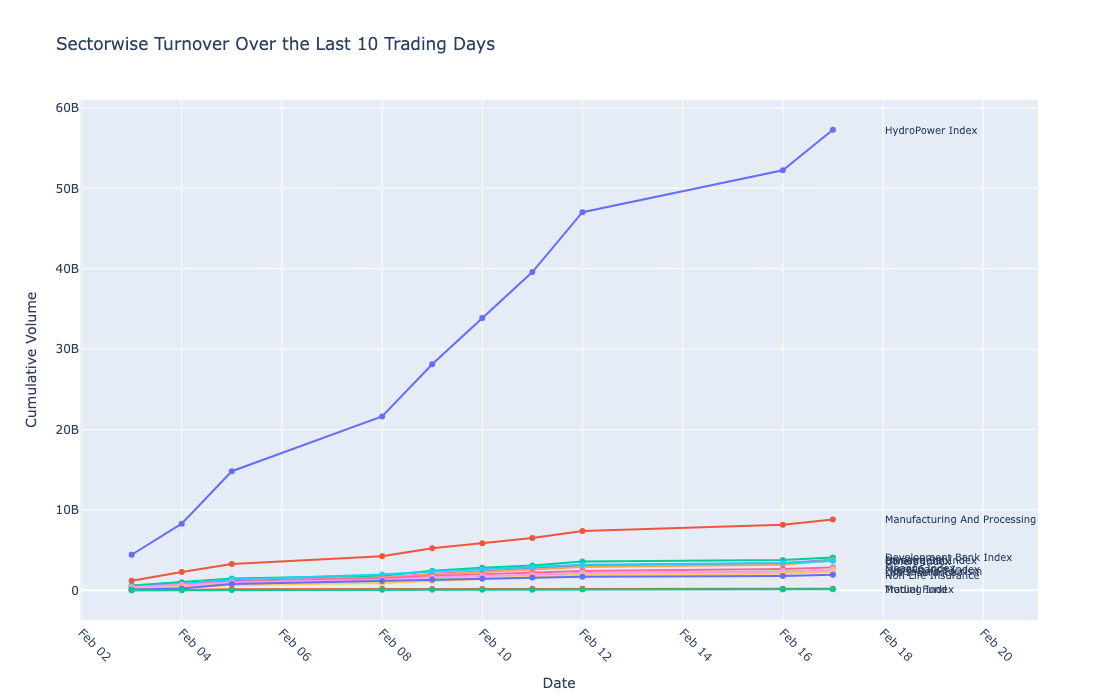

In [168]:
days = 10
sector_wise_accumulation(indices_history, trading_days = days)

In [172]:
# [ "Commercial Banks",
#     "Hotels And Tourism",
#     "Hydro Power",
#     "Tradings",
#     "Microfinance",
#     "Development Banks",
#     "Non Life Insurance",
#     "Life Insurance",
#     "Finance",
#     "Manufacturing And Processing",
#     "Investment",
#     "Others"
# ]

# Merge Sector info into adjusted_price using Symbol-Ticker match
adjusted_price_sectorwise = adjusted_price.merge(
    active_comps[['Ticker', 'Sector']],
    left_on='Ticker',
    right_on='Ticker',
    how='left'
)


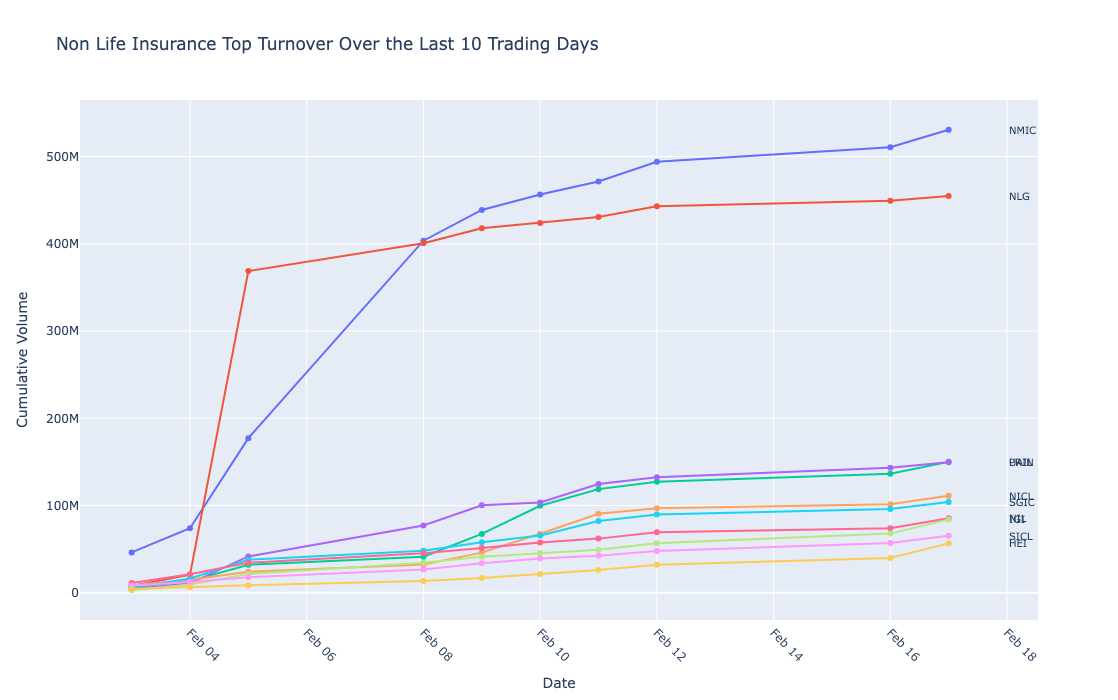

In [176]:
days = 10 #should be greater than 0
top_n = 10
sector_specific_accumulation('Non Life Insurance', adjusted_price_sectorwise, trading_days = days, top_n= top_n)

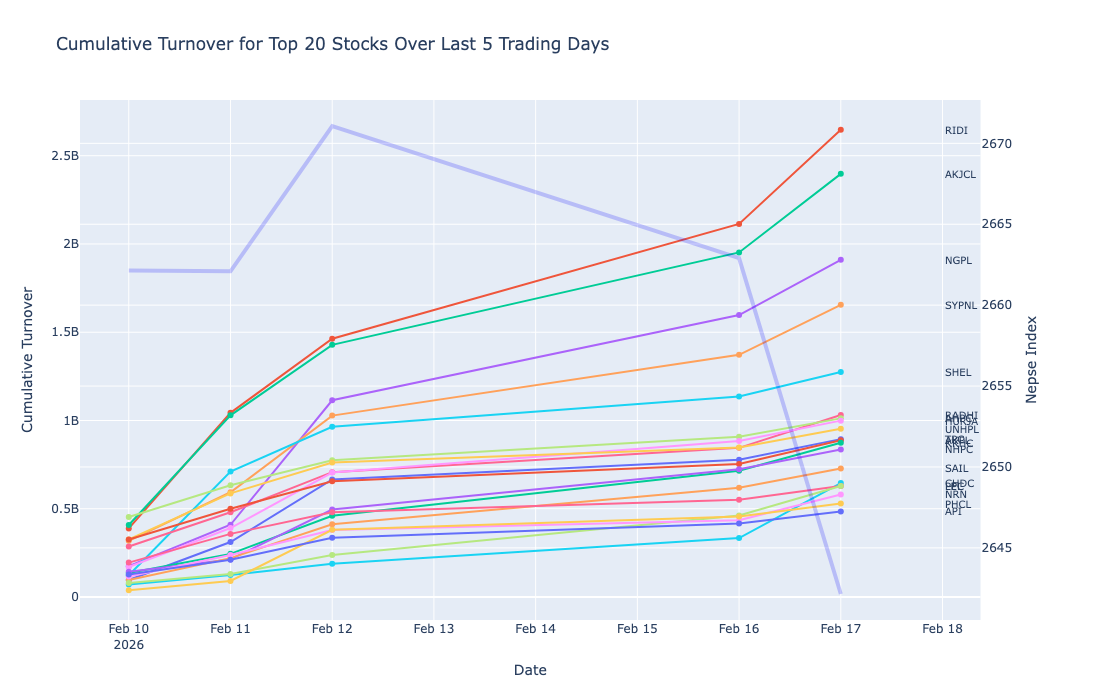

In [178]:
days = 5
top_n = 20
plot_cumulative_pct_change_by_trading_days(adjusted_price, indices_history, trading_days = days, top_n= top_n)

In [280]:
indices_data_without_nepse = indices_history[indices_history['Ticker'] != "Nepse Index"]
columns_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume']
# Remove commas and convert to float
for col in columns_to_convert:
    indices_data_without_nepse[col] = indices_data_without_nepse[col].str.replace(',', '').astype(float)

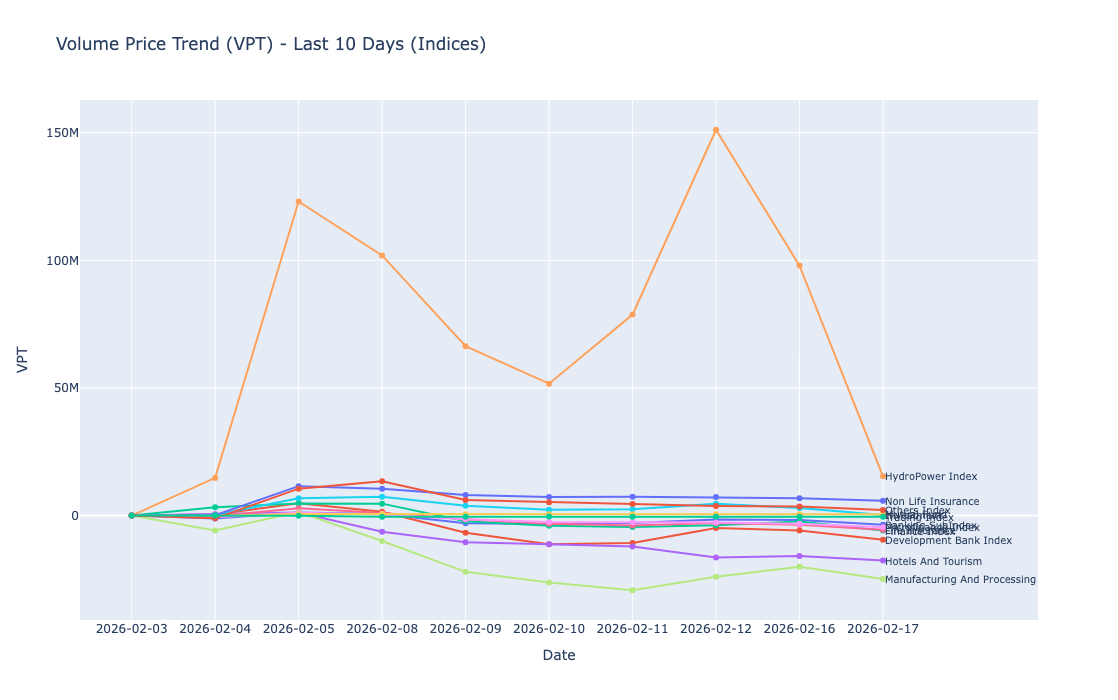

In [284]:
days = 10
calculate_and_plot_vpt(indices_data_without_nepse, 'indices', days)

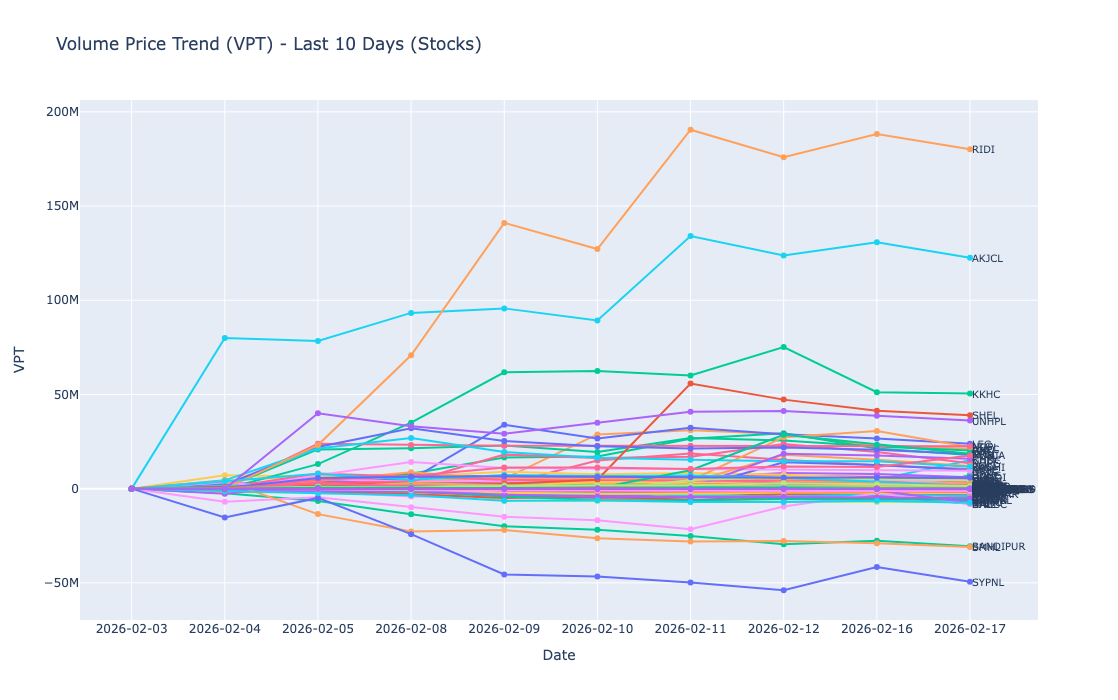

In [262]:
days = 10
calculate_and_plot_vpt(adjusted_price_sectorwise, 'stocks', days)

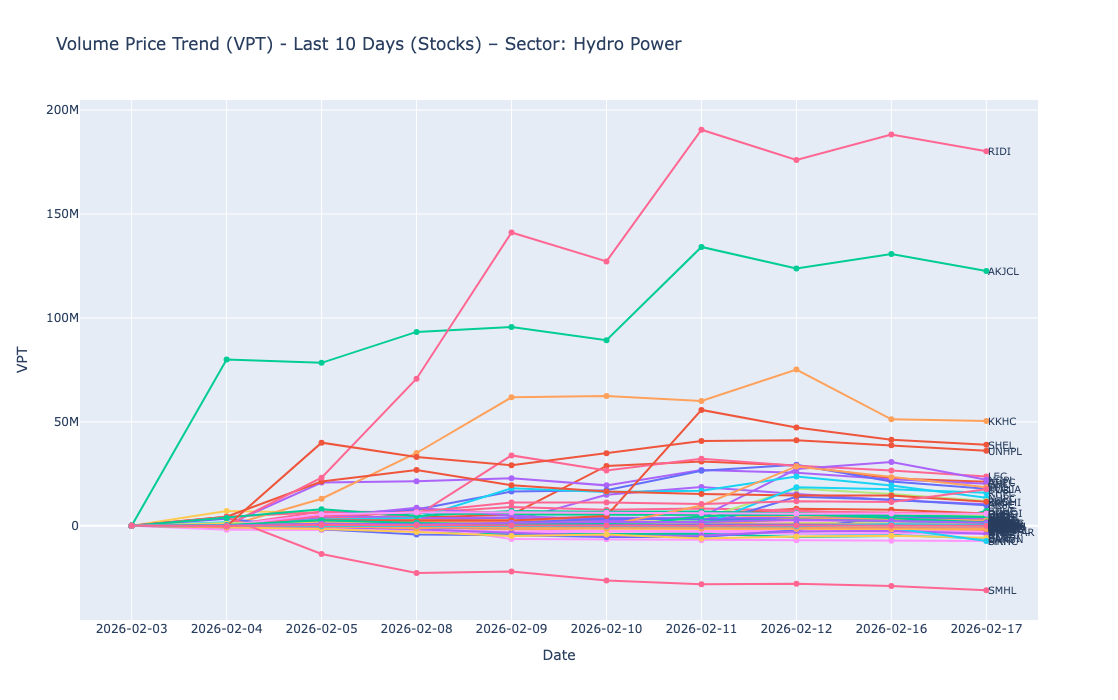

In [234]:
days = 10
calculate_and_plot_vpt(adjusted_price_sectorwise, 'stocks', days, 'Hydro Power')

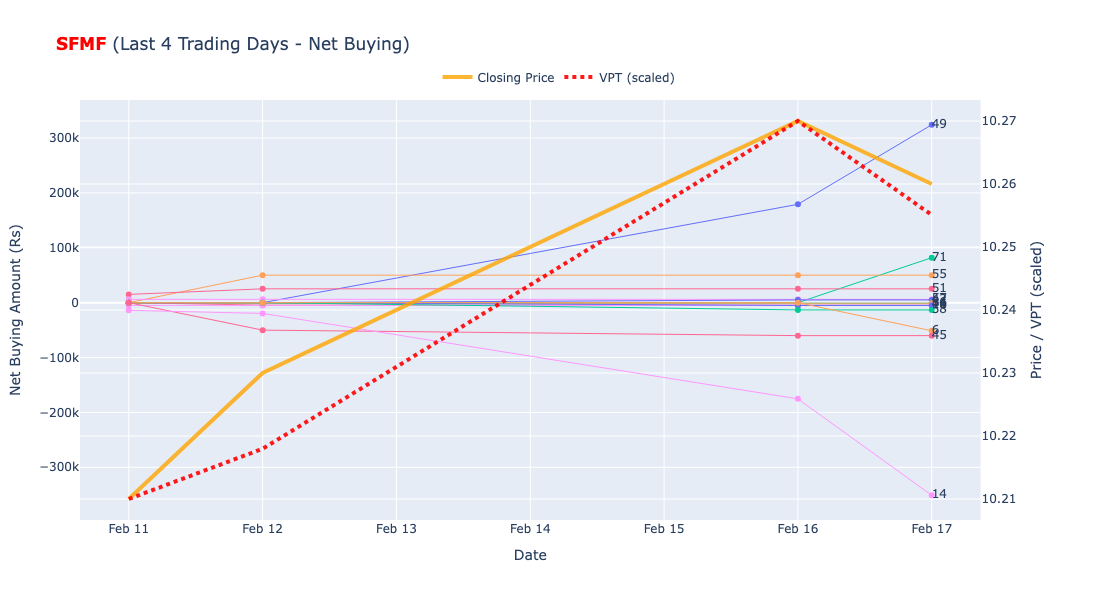

In [184]:
stock_input = 'SFMF'
days = 4
plot_top_buyers_sellers(combined_floorsheet, adjusted_price, stock_input.upper(),file_index= None,output_folder = 'All scrip accumulation charts/', days = days, save = False, show = True)

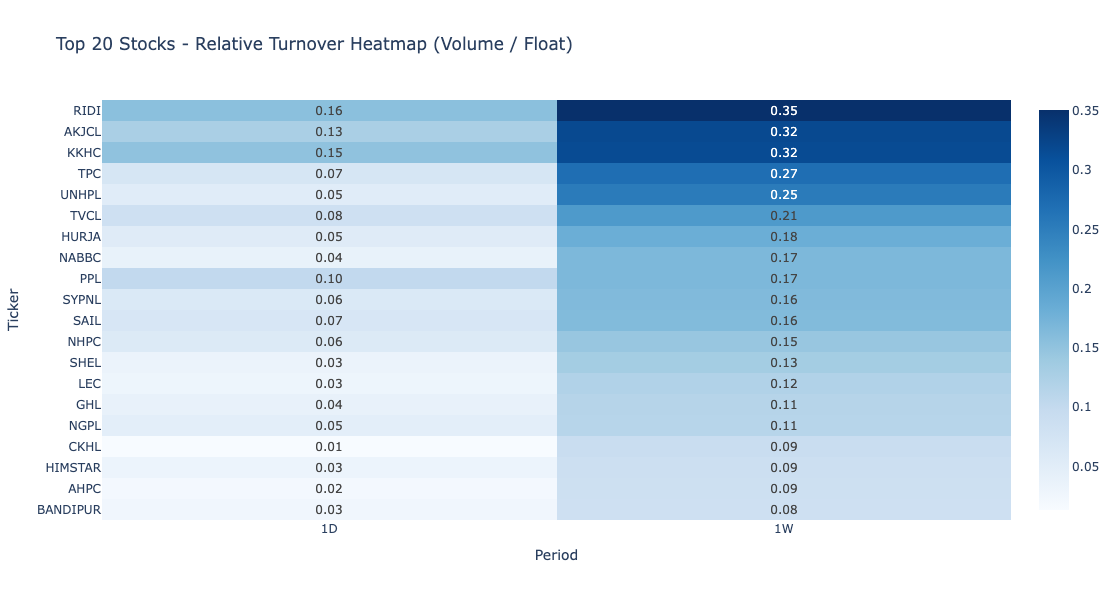

In [208]:
from scripts.volume_to_float_heatmap import plot_relative_turnover_heatmap

plot_relative_turnover_heatmap(adjusted_price, float_data, 20)

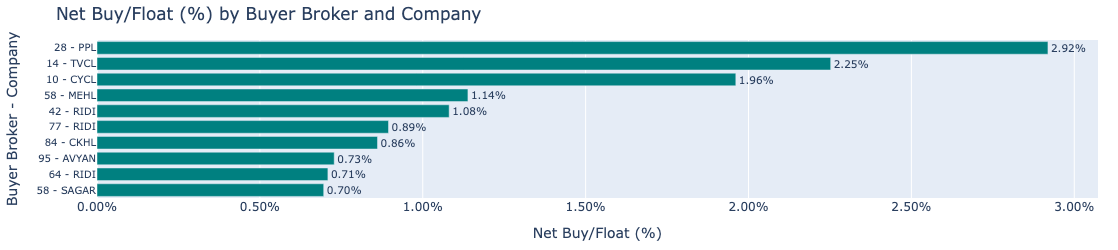

In [216]:
top_NetBuyVsFloat(combined_floorsheet, float_data, active_comps, n_day = 1, top_n = 10)

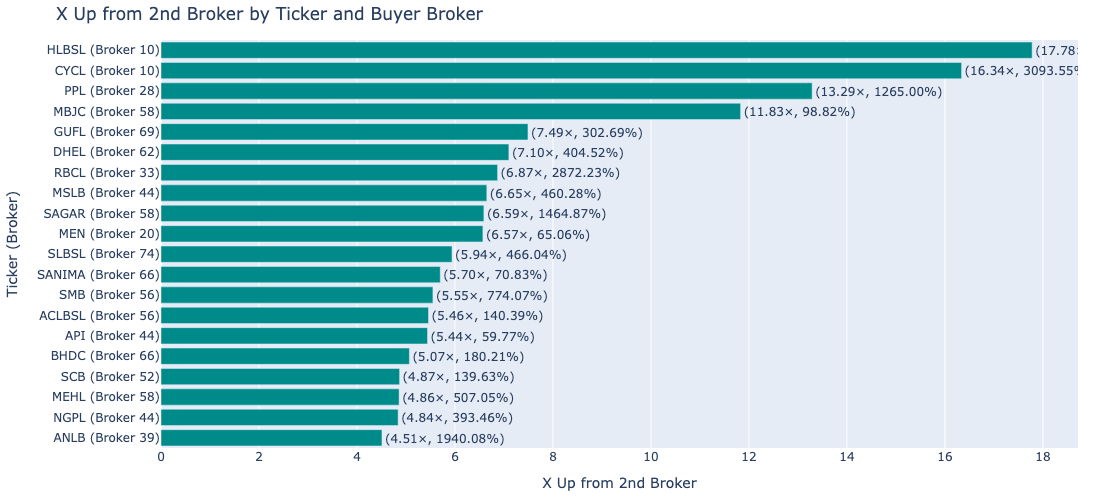

In [224]:
calculate_cornering_strength(combined_floorsheet, active_comps, float_data, top_n = 20, days = 3)

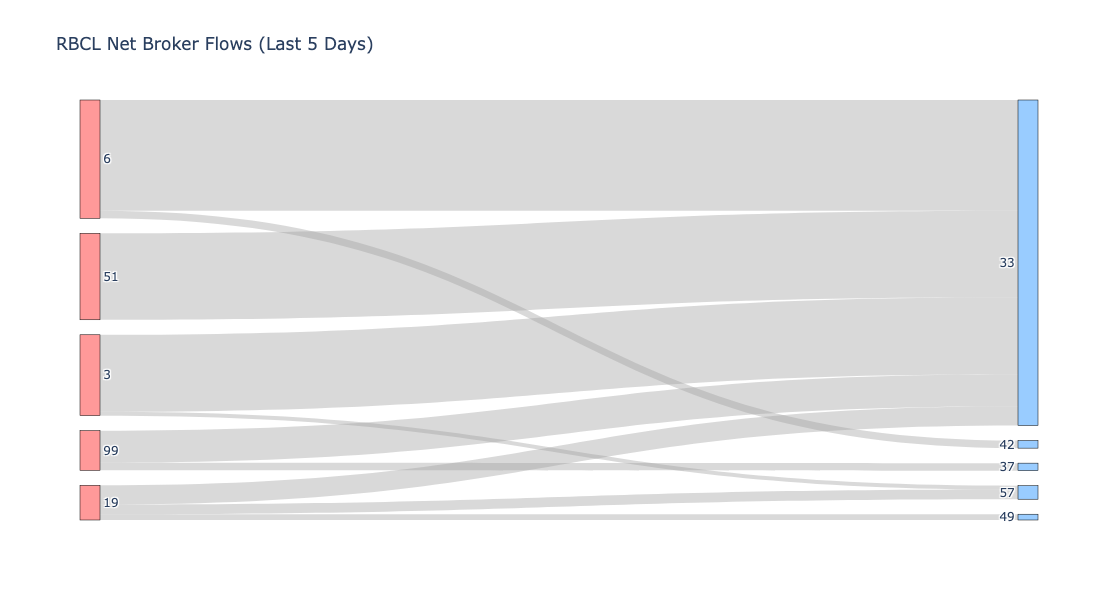

In [226]:
ticker = 'rbcl'
days = 5
top_n = 5
plot_buyer_seller_sankey(combined_floorsheet, ticker.upper(), file_index=None, output_folder=None, days=days, save=False, show=True, top_n= top_n)

In [228]:
# equity = active_comps[active_comps["Instrument"] == "Equity"]
# for index, ticker in enumerate(equity.Symbol):
#     plot_top_buyers_sellers(combined_floorsheet, adjusted_price, ticker, index, output_folder = 'All scrip accumulation charts/', days = 30, save = True, show = False)
#     print(ticker)

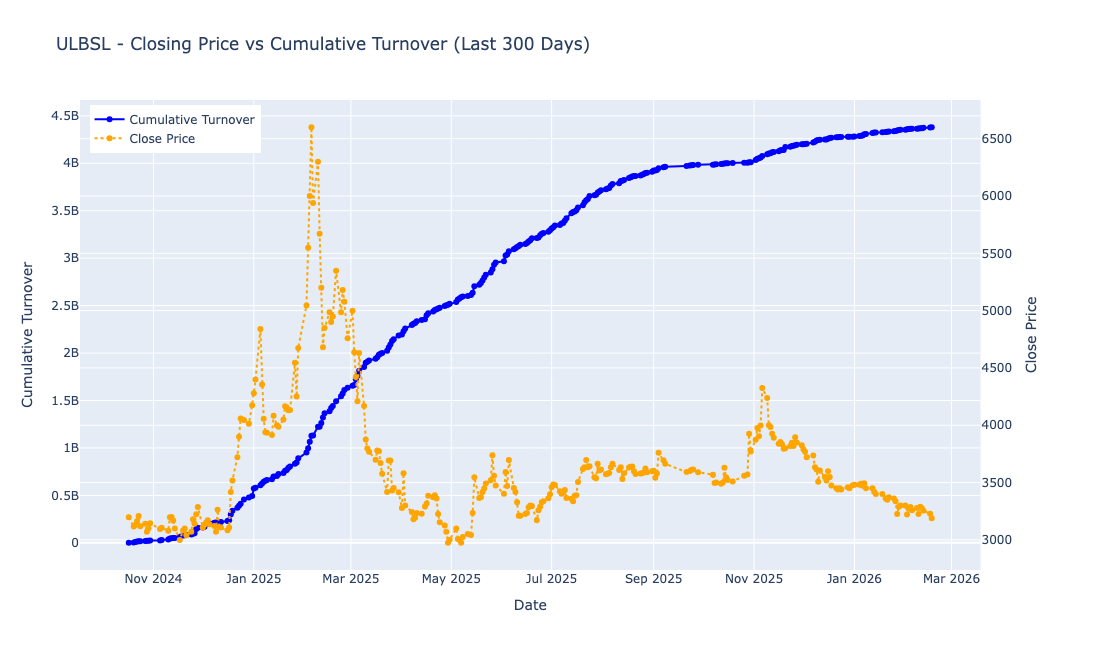

In [230]:
plot_close_vs_cum_turnover(adjusted_price, 'ULBSL', 300)